# Capstone Project – Covid-19 Classification Dataset – Exploratory Data Analisys


## Table of Contents

1. [Project Overview](#1-Project-Overview)
2. [Data Understanding and Initial Inspection](#2-Data-Understanding-and-Initial-Inspection)
3. [Data Quality Assessment](#3-Data-Quality-Assessment)
4. [Target Variable Analysis](#4-Target-Variable-Analysis)
5. [Univariate Analysis](#5-Univariate-Analysis)
6. [Bivariate Analysis](#6-Bivariate-Analysis)
7. [Multivariate Analysis](#7-Multivariate-Analysis)
10. [EDA Summary and Key Insights](#8-EDA-Summary-and-Key-Insights)
11. [Transition to Modeling](#9-Transition-to-Modeling)


# 1 Project Overview

## 1.1 Project Objective
Build an exploratory understanding of the dataset and identify patterns related to COVID-19 infection status ("Infected").


## 1.2 Dataset Description
The dataset used in this study, covid19_classification_dataset.csv, contains approximately 25,000 observations and 40 features. The features include basic demographic variables (age and gender), vital signs, laboratory values, reported symptoms, diagnostic test outcomes, and indicators of disease severity and treatment. All features are numerically encoded, with the target variable Infected labeled as 0 (Not Infected) or 1 (Infected).


## 1.3 Scope of EDA
The Exploratory Data Analysis (EDA) phase focuses on **understanding the structure, quality, and patterns within the data** to inform subsequent preprocessing and modeling decisions. This includes:

- Data Quality Assessment: Evaluating missing values, duplicate records, and data consistency.
- Univariate Analysis: Examining the distribution and statistical properties of individual features.
- Bivariate Analysis: Analyzing relationships between features and the target variable Infected.
- Multivariate Analysis: Exploring correlations, interactions, and multicollinearity among features.

The insights gained from EDA will guide feature selection, preprocessing strategies, and model development in later stages of the project.


[**GO TO - Table of Contents**](#Table-of-Contents)

# 2 Data Understanding and Initial Inspection


## 2.1 Libraries and Dataset Loading


In [1]:
# Basic imports
# Import basic libraries for data analysis and visualization
import numpy as np          # Numerical operations
import pandas as pd         # Data manipulation and analysis
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns       # Statistical data visualization


In [2]:
from pathlib import Path

# Get project root (parent of notebooks folder)
PROJECT_ROOT = Path.cwd().parent

DATA_DIR = PROJECT_ROOT / "data"
OUTPUT_DIR = PROJECT_ROOT / "outputs"
DATA_FILE = "covid19_classification_dataset.csv"

DATA_PATH = DATA_DIR / DATA_FILE

OUTPUT_DIR.mkdir(exist_ok=True)

if not DATA_PATH.exists():
    raise FileNotFoundError(
        f"Dataset not found at '{DATA_PATH}'.\n"
        "Please ensure the dataset is placed inside the 'data' folder "
        "at the project root."
    )

print("Project paths configured successfully.")
#print(f"Data path: {DATA_PATH}")
#print(f"Output directory: {OUTPUT_DIR}")

Project paths configured successfully.


In [3]:
import pandas as pd

df = pd.read_csv(DATA_PATH)

print("✅ Dataset loaded successfully")
print("Dataset shape (rows, columns):", df.shape)
df.head()


✅ Dataset loaded successfully
Dataset shape (rows, columns): (25000, 40)


,Age,Gender,Body_Temperature,Heart_Rate,Blood_Pressure,Respiratory_Rate,Oxygen_Saturation,WBC_Count,RBC_Count,Hemoglobin,...,Vaccination_Status,Antibody_Test_Result,PCR_Test_Result,CT_Scan_Result,Hospital_Visit,ICU_Admission,Ventilator_Support,Medication1,Medication2,Infected
0,13,1,35.134099,81,147,0.523761,0.302747,0.123436,0.658795,0.012816,...,0.846561,0.412137,0.436994,0.364177,0.069888,0.904606,0.651761,0.039014,0.843462,1
1,76,1,35.580493,90,130,0.966758,0.003206,0.168959,0.405961,0.333612,...,0.952789,0.918433,0.832046,0.402552,0.568562,0.797441,0.390942,0.943742,0.008779,1
2,93,1,36.924017,95,138,0.957638,0.322076,0.505236,0.819760,0.098995,...,0.687951,0.757119,0.664940,0.857466,0.169404,0.755714,0.753113,0.322734,0.100451,0
3,63,0,NaN,72,164,0.083596,0.335388,0.872939,0.963631,0.797913,...,0.736746,0.199022,0.021751,0.288700,0.131783,0.068656,0.865557,0.680145,0.722547,1
4,88,1,NaN,60,160,0.394405,0.240267,0.599968,0.470137,0.863037,...,0.882584,0.948702,0.183534,0.996122,0.297384,0.210018,0.598593,0.222116,0.882834,1


## 2.2 Dataset Shape and Structure


In [4]:
# Display the shape of the dataset
# Shows the total number of rows and columns in the DataFrame

df.shape

(25000, 40)

In [5]:
# Display dataset structure and data types
# Shows column names, non-null counts, and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      25000 non-null  int64  
 1   Gender                   25000 non-null  int64  
 2   Body_Temperature         24995 non-null  float64
 3   Heart_Rate               25000 non-null  int64  
 4   Blood_Pressure           25000 non-null  int64  
 5   Respiratory_Rate         24996 non-null  float64
 6   Oxygen_Saturation        25000 non-null  float64
 7   WBC_Count                25000 non-null  float64
 8   RBC_Count                24996 non-null  float64
 9   Hemoglobin               25000 non-null  float64
 10  Platelets                25000 non-null  float64
 11  Lymphocytes              25000 non-null  float64
 12  Neutrophils              25000 non-null  float64
 13  Cough                    24997 non-null  float64
 14  Fever                 

## 2.3 Data Types and Feature Categorization


In [6]:
# Define the target column
TARGET_COL = "Infected"

# Check if the target column exists in the dataset
if TARGET_COL not in df.columns:
    raise ValueError(f"Target column '{TARGET_COL}' not found in the dataset.")

# Separate feature columns from the target
X_cols = [c for c in df.columns if c != TARGET_COL]

# Select numeric feature columns
numeric_cols = df[X_cols].select_dtypes(include=["number"]).columns.tolist()

binary_cols = []
continuous_cols = []

# Loop through numeric columns to identify binary vs continuous features
for col in numeric_cols:
    # Get unique non-missing values for the column
    unique_vals = set(df[col].dropna().unique())

    # Check if the column contains only 0 and 1
    if unique_vals.issubset({0, 1}):
        binary_cols.append(col)
    else:
        continuous_cols.append(col)

# Identify non-numeric (categorical) columns, if any
categorical_cols = df[X_cols].select_dtypes(exclude=["number"]).columns.tolist()

# Print summary of feature types
print("Target:", TARGET_COL)
print("Continuous (numeric, non-binary):", len(continuous_cols))
print("Binary (0/1):", len(binary_cols))
print("Categorical (non-numeric):", len(categorical_cols))


Target: Infected
Continuous (numeric, non-binary): 38
Binary (0/1): 1
Categorical (non-numeric): 0


[**GO TO - Table of Contents**](#Table-of-Contents)

# 3 Data Quality Assessment


## 3.1 Duplicate Record Analysis


In [7]:
# Count duplicate rows in the dataset
# df.duplicated() marks rows that are exact duplicates
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# Display a few duplicate rows (if any) for inspection
# keep=False shows all occurrences of duplicated rows
df[df.duplicated(keep=False)].head()



Duplicate rows: 10


,Age,Gender,Body_Temperature,Heart_Rate,Blood_Pressure,Respiratory_Rate,Oxygen_Saturation,WBC_Count,RBC_Count,Hemoglobin,...,Vaccination_Status,Antibody_Test_Result,PCR_Test_Result,CT_Scan_Result,Hospital_Visit,ICU_Admission,Ventilator_Support,Medication1,Medication2,Infected
8,45,0,36.931044,75,138,0.806660,0.760897,0.274811,0.351118,0.879242,...,0.619777,0.134877,0.303125,0.965084,0.323287,0.348416,0.707767,0.362656,0.467465,1
9,82,0,35.732022,79,85,0.360810,0.666895,0.952308,0.684625,0.309910,...,0.168260,0.040310,0.529145,0.910439,0.046989,0.528761,0.433621,0.156762,0.491420,1
10,95,1,35.723535,97,113,0.227497,0.269448,0.059378,0.290712,0.434305,...,0.659182,0.867267,0.328385,0.127435,0.738122,0.106052,0.164120,0.185784,0.074783,0
1810,45,0,36.931044,75,138,0.806660,0.760897,0.274811,0.351118,0.879242,...,0.619777,0.134877,0.303125,0.965084,0.323287,0.348416,0.707767,0.362656,0.467465,1
1811,82,0,35.732022,79,85,0.360810,0.666895,0.952308,0.684625,0.309910,...,0.168260,0.040310,0.529145,0.910439,0.046989,0.528761,0.433621,0.156762,0.491420,1


## 3.2 Missing Values Summary


In [8]:
# Count missing values in each column
# df.isna().sum() returns the number of NaN values per column
missing = df.isna().sum()

# Calculate percentage of missing values per column
# Divides missing count by total number of rows
missing_pct = (missing / len(df) * 100).round(2)

# Create a summary table for missing values
# Combines counts and percentages and sorts by missing count
missing_summary = pd.DataFrame({
    "missing_count": missing,
    "missing_percent": missing_pct
}).sort_values("missing_count", ascending=False)

# Display the top columns with the most missing values
missing_summary.head(15)



,missing_count,missing_percent
Fatigue,7,0.03
Body_Temperature,5,0.02
Loss_of_Smell,5,0.02
Respiratory_Rate,4,0.02
RBC_Count,4,0.02
Cough,3,0.01
Sore_Throat,2,0.01
Gender,0,0.00
WBC_Count,0,0.00
Oxygen_Saturation,0,0.00


In [9]:
# Count how many columns contain at least one missing value
# (missing > 0) creates a boolean mask for columns with missing data
(missing > 0).sum()


np.int64(7)

## 3.3 Missing Data Mechanisms (MCAR, MAR, MNAR)
This section is conceptual (no code required). In practice, we look for patterns in missingness to decide how to impute.


## 3.4 Missingness vs Target Variable Analysis


In [10]:
# Count missing values for each row
# axis=1 calculates missing values across columns for each row
df["missing_count_row"] = df.isna().sum(axis=1)

# Compare missing values per row between infected and not infected groups
# groupby() separates rows based on the target column
# describe() provides summary statistics for comparison
df.groupby(TARGET_COL)["missing_count_row"].describe()



,count,mean,std,min,25%,50%,75%,max
Infected,,,,,,,,
0,12455.0,0.001285,0.037996,0.0,0.0,0.0,0.0,2.0
1,12545.0,0.001116,0.035697,0.0,0.0,0.0,0.0,2.0


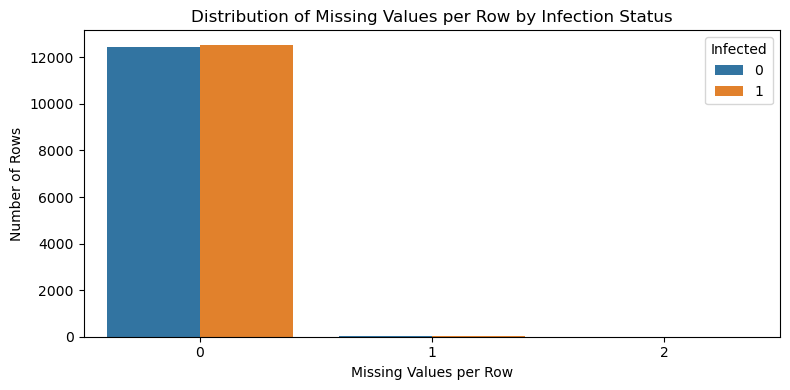

In [11]:
# Visualize distribution of missing values per row by infection status
# This makes rare missing values easier to see than a boxplot

plt.figure(figsize=(8, 4))

sns.countplot(
    data=df,
    x="missing_count_row",
    hue="Infected"  # Changed 'Infected_Label' to 'Infected'
)

plt.title("Distribution of Missing Values per Row by Infection Status")
plt.xlabel("Missing Values per Row")
plt.ylabel("Number of Rows")
plt.tight_layout()
plt.show()

## 3.5 Missingness Conclusion and Imputation Strategy
Based on the missingness summary and patterns:
- Drop columns with too much missingness.
- Impute (mean/median for continuous, mode for categorical).
- Use model-based imputation later.


[**GO TO - Table of Contents**](#Table-of-Contents)

# 4 Target Variable Analysis


## 4.1 Target Variable Overview

Target Variable Analysis:

The target variable "Infected" represents whether an individual is infected with COVID-19:

- 0: Not Infected
- 1: Infected

Before conducting univariate and multivariate analysis, it is important to examine the distribution of the target variable. Understanding class balance helps determine:

- Whether class imbalance exists
- Which evaluation metrics are appropriate
- Whether resampling or threshold adjustments may be required during modeling

In [12]:
# Check the distribution of the target variable
# value_counts() shows how many samples belong to each class
# dropna=False ensures missing values (if any) are also counted
df[TARGET_COL].value_counts(dropna=False)



Infected
1    12545
0    12455
Name: count, dtype: int64

## 4.2 Target Distribution (Counts and Percentages)


In [13]:
# Calculate the count of each class in the target variable
# value_counts() returns how many rows belong to each class
target_counts = df[TARGET_COL].value_counts()

# Calculate the percentage distribution of each class
# Divides each class count by the total number of samples
target_pct = (target_counts / target_counts.sum() * 100).round(2)

# Combine counts and percentages into a single table
pd.DataFrame({
    "count": target_counts,
    "percent": target_pct
})



,count,percent
Infected,,
1,12545,50.18
0,12455,49.82


## 4.3 Target Distribution Visualization


C:\Users\rames\AppData\Local\Temp\ipykernel_4324\1576004749.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


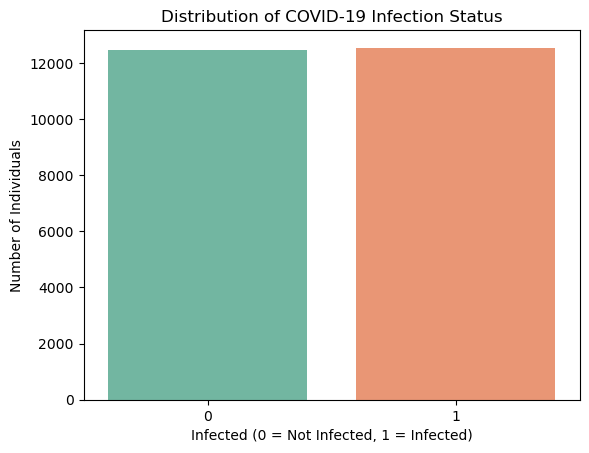

In [14]:
# Plot the distribution of the target variable
# countplot() shows how many samples belong to each class
plt.figure()

sns.countplot(
    x=TARGET_COL,
    data=df,
    palette="Set2"
)

# Add title and axis labels
plt.title("Distribution of COVID-19 Infection Status")
plt.xlabel("Infected (0 = Not Infected, 1 = Infected)")
plt.ylabel("Number of Individuals")

plt.show()



## 4.4 Interpretation of Target Distribution
If the target classes are imbalanced, we may need stratified splits and possibly class weights or resampling during modeling.

The target variable Infected is nearly evenly distributed across the dataset, with approximately 49.8% of individuals classified as not infected and 50.2% classified as infected. This indicates that the dataset is well balanced with respect to the target variable.

In this case, standard classification algorithms and evaluation metrics such as accuracy, precision, recall, and F1-score can be applied without requiring resampling techniques or class-weight adjustments.


[**GO TO - Table of Contents**](#Table-of-Contents)

# 5 Univariate Analysis


## 5.1  Univariate Analysis: Continuous Features


Univariate analysis examines the distribution and statistical properties of individual continuous variables independently of other features. This analysis helps identify:

- Central tendency (mean, median)
- Variability (standard deviation, range, interquartile range)
- Distribution shape (skewness)
- Potential outliers or anomalous values

Understanding these characteristics is essential for detecting data quality issues, informing preprocessing decisions, and interpreting feature behavior prior to modeling.

**Summary Statistics for Continuous Features**

In [15]:
# Generate summary statistics for continuous features
# describe() provides count, mean, std, min, max, and quartiles
# .T transposes the table to make features easier to read
df[continuous_cols].describe().T.head(10)



,count,mean,std,min,25%,50%,75%,max
Age,25000.0,49.374520,28.763256,0.000000,25.000000,49.000000,74.000000,99.000000
Body_Temperature,24995.0,36.010596,1.001668,32.081897,35.336356,36.015799,36.689677,39.990883
Heart_Rate,25000.0,79.541840,11.567202,60.000000,70.000000,80.000000,90.000000,99.000000
Blood_Pressure,25000.0,129.556360,28.827868,80.000000,105.000000,130.000000,155.000000,179.000000
Respiratory_Rate,24996.0,0.498993,0.289148,0.000032,0.249001,0.499687,0.749629,0.999976
Oxygen_Saturation,25000.0,0.505883,0.288559,0.000011,0.257221,0.511190,0.756613,0.999991
WBC_Count,25000.0,0.497553,0.289735,0.000004,0.245350,0.496803,0.751158,0.999989
RBC_Count,24996.0,0.498508,0.288119,0.000017,0.249793,0.496541,0.747002,0.999996
Hemoglobin,25000.0,0.495826,0.288938,0.000049,0.242994,0.494315,0.747052,0.999989
Platelets,25000.0,0.497389,0.289626,0.000125,0.245331,0.495002,0.748115,0.999967


**Distribution Plots (Histograms) for Continuous Features**

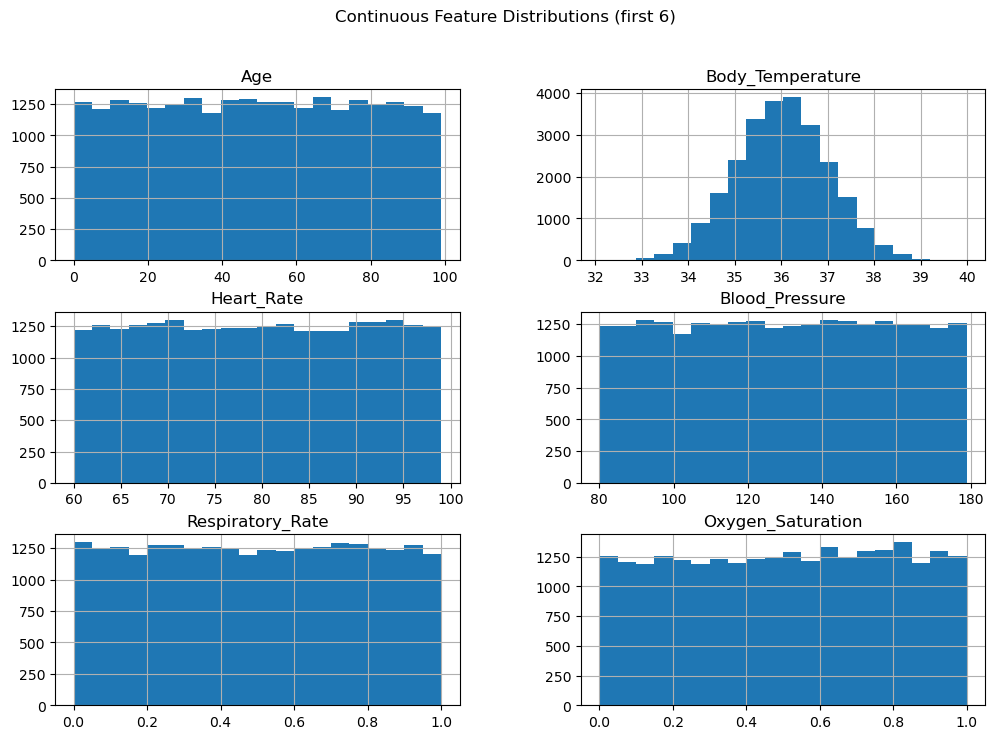

In [16]:
# Plot histograms for the first 6 continuous features
# This helps visualize the distribution and spread of each feature
cols_to_plot = continuous_cols[:6]

# Create histograms with fixed bins for consistency
df[cols_to_plot].hist(bins=20, figsize=(12, 8))

# Add an overall title for the set of plots
plt.suptitle("Continuous Feature Distributions (first 6)")

plt.show()



**Outlier Detection (Boxplots) for Continuous Features (Outlier Detection)**

Uses boxplots to visually inspect potential outliers in continuous features.

Boxplots are particularly useful for identifying:

- extreme values
- spread and interquartile ranges

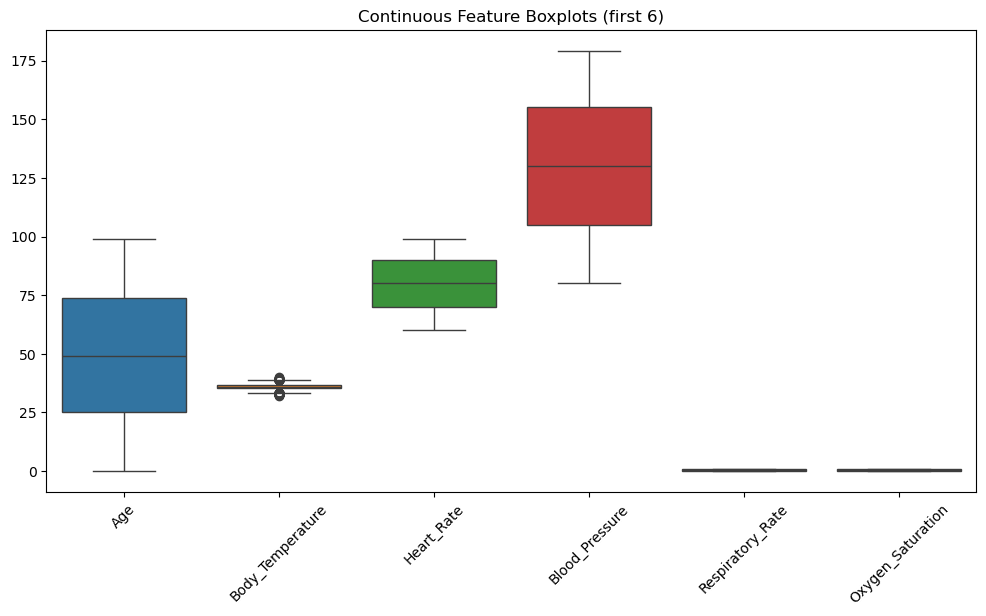

In [17]:
# Create boxplots for the first 6 continuous features
# Boxplots help identify spread, median, and potential outliers
cols_to_plot = continuous_cols[:6]

plt.figure(figsize=(12, 6))

# Draw boxplots for selected continuous features
sns.boxplot(data=df[cols_to_plot])

# Add title and rotate x-axis labels for readability
plt.title("Continuous Feature Boxplots (first 6)")
plt.xticks(rotation=45)

plt.show()



## 5.2 Univariate Analysis: Binary Features


Univariate Analysis: Binary Features:
This analysis helps:

- Identify common and rare symptoms or conditions
- Detect highly imbalanced binary variables
- Provide context for later bivariate analysis with the target variable

In [18]:
# Create a frequency table for binary (0/1) features
# This shows how often each value (0 or 1) appears in each binary column
binary_summary = {}

# Loop through each binary column
for col in binary_cols:
    # Count occurrences of 0 and 1 (including missing values if any)
    binary_summary[col] = df[col].value_counts(dropna=False).to_dict()

# Convert the dictionary into a DataFrame for easy viewing
# fillna(0) replaces missing counts with 0
# astype(int) converts counts to integers
pd.DataFrame(binary_summary).fillna(0).astype(int).T.head(10)


,0,1
Gender,12581,12419


**Binary Feature Prevalence Visualization (plot)**

This cell visualizes the prevalence of binary features using a horizontal bar chart, making it easier to compare the # relative frequency of symptoms and conditions.

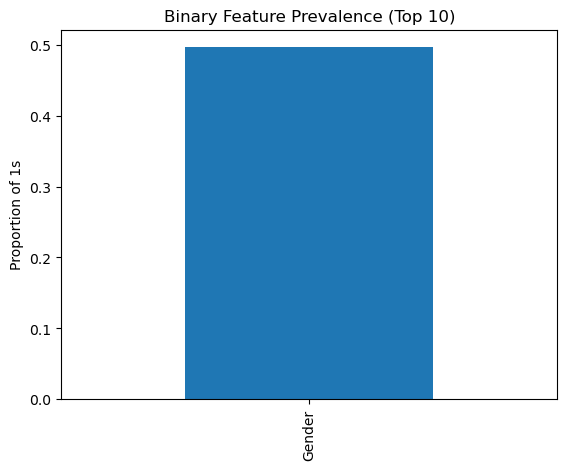

In [19]:
# Calculate prevalence of binary features
# mean() gives the proportion of 1s since values are 0/1
binary_prev = pd.Series(
    {col: df[col].mean() for col in binary_cols}
).sort_values(ascending=False)

# Plot the top 10 binary features by prevalence
binary_prev.head(10).plot(kind="bar")

# Add labels and title for clarity
plt.ylabel("Proportion of 1s")
plt.title("Binary Feature Prevalence (Top 10)")

plt.show()



### Notes on Binary Encoding
Although many variables in the dataset represent binary clinical indicators (e.g., symptoms, test results, and interventions), only the Gender variable is strictly encoded as binary (0/1). Other binary-concept features are numerically encoded on a continuous 0–1 scale and are therefore treated as continuous variables in this analysis.

As a result, Gender is the only feature included in the strict binary univariate analysis.


[**GO TO - Table of Contents**](#Table-of-Contents)

# 6 Bivariate Analysis


## 6.1 Continuous Features vs Target
Bivariate Analysis - Continuous Features vs Target Variable:

Bivariate analysis examines the relationship between individual predictor variables and the target variable Infected. Here, continuous features are analyzed with respect to infection status to identify differences in central tendency and distribution between infected and non-infected individuals.

This analysis helps:

- Identify features that differ meaningfully by infection status
- Provide early insight into potentially important predictors
- Guide feature selection and model interpretation

In [20]:
# Compare mean values of continuous features by infection status
# groupby() splits the data by the target variable
# mean() calculates average values for each group
df.groupby(TARGET_COL)[continuous_cols[:8]].mean().T

Infected,0,1
Age,49.500602,49.249342
Body_Temperature,36.020335,36.000929
Heart_Rate,79.491931,79.591391
Blood_Pressure,130.011802,129.104185
Respiratory_Rate,0.499851,0.498140
Oxygen_Saturation,0.504149,0.507605
WBC_Count,0.497221,0.497883
RBC_Count,0.498817,0.498202


**Boxplots of Continuous Features by Target**

Visualizes the distribution of continuous features across infection status using boxplots.
Boxplots allow comparison of:

- Median differences
- Spread (IQR)
- Overlap between infected and non-infected groups

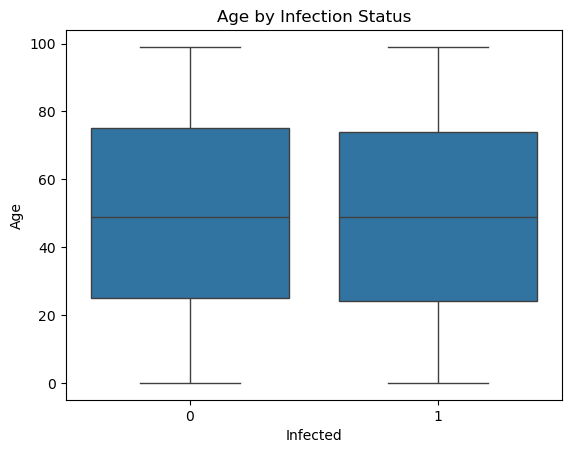

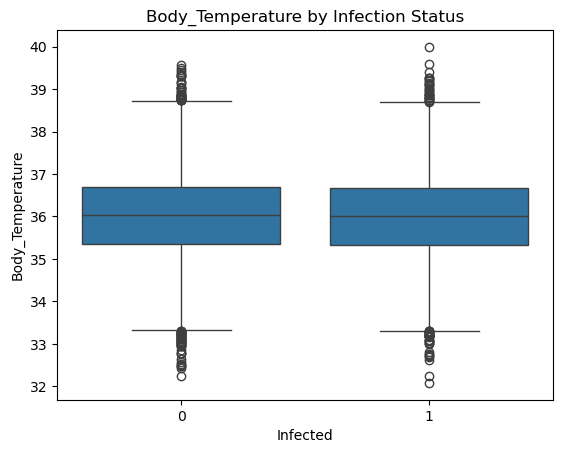

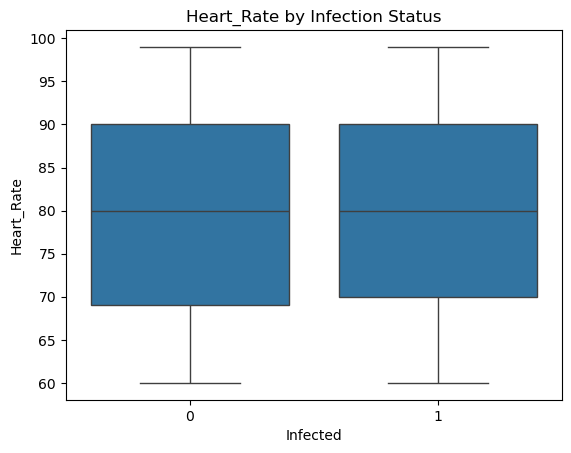

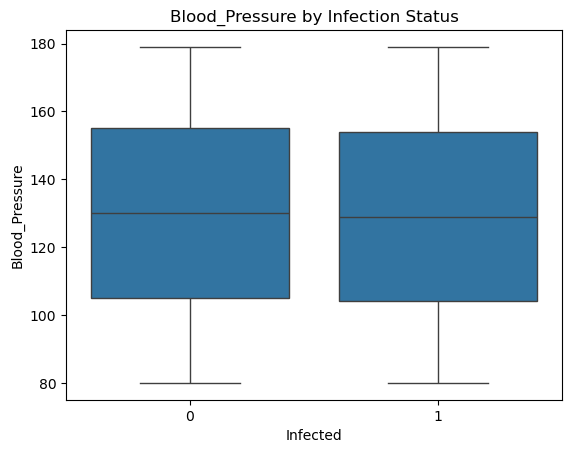

In [21]:
# Create boxplots of continuous features grouped by infection status
# This helps compare distributions between infected and not infected groups
cols_to_plot = continuous_cols[:4]

# Loop through selected continuous features
for col in cols_to_plot:
    # Draw boxplot for each feature by target class
    sns.boxplot(data=df, x=TARGET_COL, y=col)

    # Add a title for each plot
    plt.title(f"{col} by Infection Status")

    plt.show()


## 6.2 Binary Features vs Target


In [22]:
# Calculate infection rate when a binary feature equals 1
# This shows how strongly each feature is associated with infection
rates = {}

# Loop through the first 10 binary features
for col in binary_cols[:10]:
    # Select rows where the feature value is 1
    subset = df[df[col] == 1]

    # Calculate infection rate for the subset
    # mean() gives the proportion of infected cases
    if len(subset) > 0:
        rates[col] = subset[TARGET_COL].mean()
    else:
        rates[col] = np.nan

# Convert results to a Series and sort by infection rate
pd.Series(rates).sort_values(ascending=False)


Gender    0.4969
dtype: float64

## 6.3 Extra Relationship Visualizations (Target vs Selected Features)
These additional plots strengthen the EDA by clearly showing how features differ between infected vs not infected cases.
- **Countplots**: good for binary/categorical features
- **Scatter plot**: shows relationship between two numeric features, colored by the target
(We intentionally keep this simple and limit to a few features so plots are readable.)

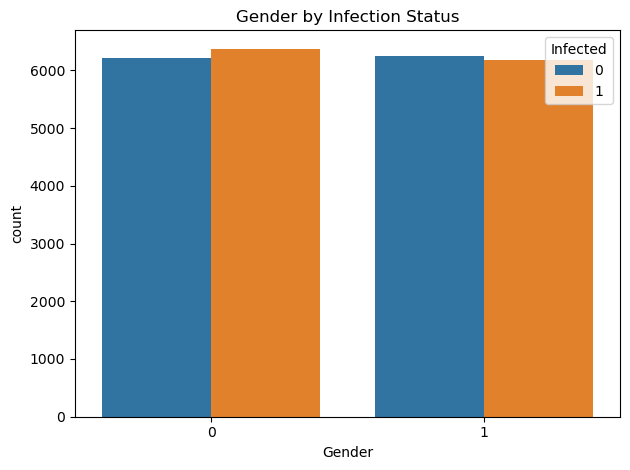

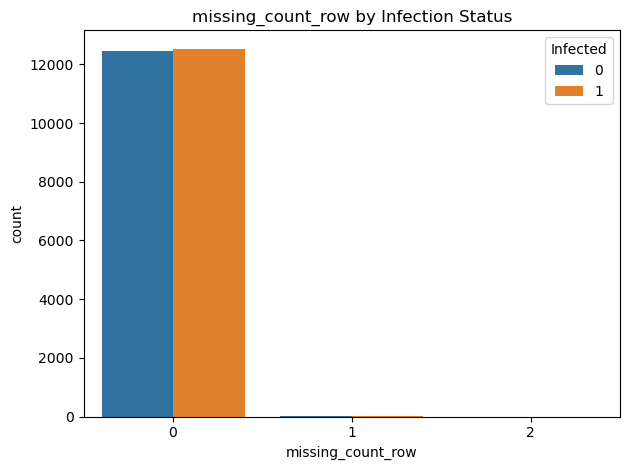

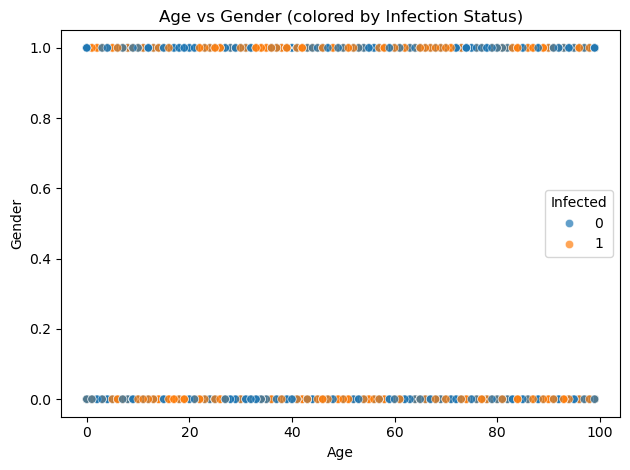

In [23]:
# Extra relationship visualizations between features and the target
import seaborn as sns
import matplotlib.pyplot as plt

# A) Binary / categorical features vs target
# Countplots show how feature values differ between infected and not infected groups
binary_cols = [
    c for c in df.columns
    if c not in ['Infected'] and df[c].nunique(dropna=True) <= 3
]

# Plot only the first 4 binary features to keep visuals readable
for col in binary_cols[:4]:
    plt.figure()

    # Count occurrences of each feature value, split by infection status
    sns.countplot(data=df, x=col, hue='Infected')

    plt.title(f'{col} by Infection Status')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# B) Relationship between two numeric features colored by target
# Scatterplot helps visualize separation between infected and not infected groups
numeric_cols2 = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols2 = [c for c in numeric_cols2 if c != 'Infected']

# Check if at least two numeric features exist
if len(numeric_cols2) >= 2:
    x_col, y_col = numeric_cols2[0], numeric_cols2[1]

    plt.figure()

    # Scatter plot with color indicating infection status
    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        hue='Infected',
        alpha=0.7
    )

    plt.title(f'{x_col} vs {y_col} (colored by Infection Status)')
    plt.tight_layout()
    plt.show()
else:
    # Print a message if there are not enough numeric features
    print('Not enough numeric features for a scatter plot.')


[**GO TO - Table of Contents**](#Table-of-Contents)

# 7 Multivariate Analysis


**Multivariate Analysis Overview:**

Multivariate analysis explores relationships among multiple features simultaneously to identify patterns, dependencies, and potential redundancy in the dataset. While univariate and bivariate analyses examine features in isolation, multivariate analysis provides insight into how features interact and co-vary.


## 7.1 Correlation Matrix of Continuous Features
Computes the pairwise correlation matrix for continuous features to identify linear relationships, potential redundancy, and multicollinearity.

In [24]:
# Compute correlation matrix for continuous features
# Correlation shows the strength and direction of relationships between variables
print("Correlation matrix computed for continuous features.")

corr_matrix = df[continuous_cols].corr()

# Display a small portion of the correlation matrix for preview
corr_matrix.iloc[:5, :5]



Correlation matrix computed for continuous features.


,Age,Body_Temperature,Heart_Rate,Blood_Pressure,Respiratory_Rate
Age,1.000000,0.003422,0.000971,-0.013215,-0.001249
Body_Temperature,0.003422,1.000000,-0.003704,-0.007501,-0.001996
Heart_Rate,0.000971,-0.003704,1.000000,-0.001906,-0.003181
Blood_Pressure,-0.013215,-0.007501,-0.001906,1.000000,-0.011972
Respiratory_Rate,-0.001249,-0.001996,-0.003181,-0.011972,1.000000


## 7.2 Correlation Heatmap (continuous features)
Visualizes the correlation matrix using a heatmap, making it easier to identify strong positive or negative relationships between features.

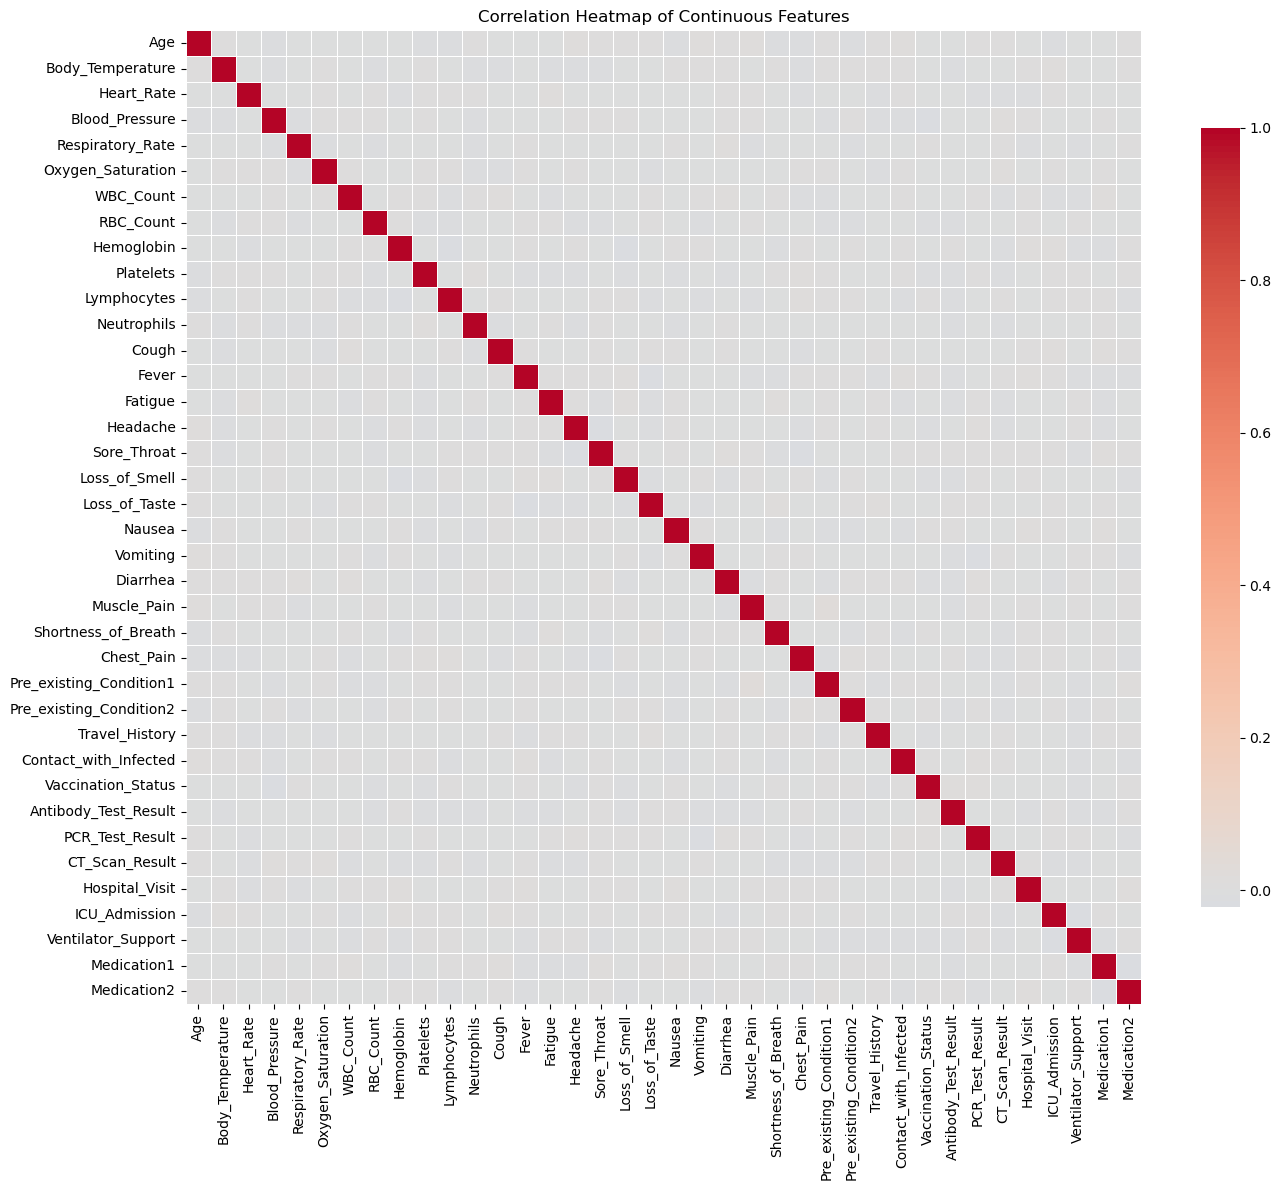

In [25]:
# Plot a heatmap for the correlation matrix
# Heatmap helps visualize relationships between continuous features

plt.figure(figsize=(14, 12))

# Create correlation heatmap
# coolwarm highlights positive and negative correlations
# center=0 centers the color scale at zero
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

# Add title and adjust layout
plt.title("Correlation Heatmap of Continuous Features")
plt.tight_layout()

plt.show()


**Interpretation of Correlation Heatmap:**

- The correlation heatmap was used to examine linear relationships among the continuous features in the dataset. Each cell represents the Pearson correlation coefficient between a pair of variables, with values ranging from -1 to +1. Darker colors indicate stronger correlations, while lighter colors indicate weaker or near-zero relationships. The diagonal elements represent self-correlation and therefore have a value of 1.0, which is expected and not considered in interpretation.

- Overall, the heatmap shows that most continuous features exhibit very weak correlations with one another, as evidenced by the predominantly light-colored off-diagonal cells. This indicates low multicollinearity among the continuous variables, suggesting that these features are largely independent and do not strongly move together in a linear manner.

- The absence of strong positive or negative correlations implies that no single continuous feature dominates or strongly explains variation in other features. From a modeling perspective, this is advantageous because it reduces the risk of multicollinearity-related instability in linear models such as Logistic Regression. However, it also suggests that individual continuous features alone provide limited predictive power, and that COVID-19 infection status is more likely influenced by a combination of multiple features rather than any single measurement.

## 7.3 Correlation of Feature–Target Correlation Analysis
This cell computes the Pearson correlation between each # continuous feature and the target variable 'Infected'. # Although correlation measures linear association, it provides a useful first look at feature–target relationships.

In [26]:
# Compute correlation between continuous features and the target variable
# corrwith() calculates correlation of each feature with the target
feature_target_corr = (
    df[continuous_cols]
    .corrwith(df[TARGET_COL])
    .sort_values(ascending=False)
)

# Convert results into a DataFrame for easy viewing
feature_target_corr_df = feature_target_corr.reset_index()
feature_target_corr_df.columns = ["Feature", "Correlation_with_Infected"]

# Display correlation results
print("Correlation of Continuous Features with Target Variable:")
display(feature_target_corr_df)



Correlation of Continuous Features with Target Variable:


,Feature,Correlation_with_Infected
0,Ventilator_Support,0.011456
1,Cough,0.009607
2,Headache,0.008716
3,CT_Scan_Result,0.007348
4,Sore_Throat,0.006398
5,Oxygen_Saturation,0.005987
6,Hospital_Visit,0.005573
7,Heart_Rate,0.004299
8,Fatigue,0.003973
9,Neutrophils,0.003905


## 7.4 Top Features by Absolute Correlation
List of fFeatures based on the absolute value of their correlation with the target variable, highlighting those with relatively stronger linear associations.


In [27]:
# Identify top features based on absolute correlation with the target
# Absolute correlation highlights both strong positive and negative relationships
top_corr_features = (
    feature_target_corr_df
    .assign(Abs_Correlation=lambda x: x["Correlation_with_Infected"].abs())
    .sort_values(by="Abs_Correlation", ascending=False)
)

# Display the top 10 most correlated features
print("Top Features by Absolute Correlation with Target:")
display(top_corr_features.head(10))



Top Features by Absolute Correlation with Target:


,Feature,Correlation_with_Infected,Abs_Correlation
37,Blood_Pressure,-0.015742,0.015742
36,Pre_existing_Condition1,-0.013108,0.013108
0,Ventilator_Support,0.011456,0.011456
35,PCR_Test_Result,-0.011268,0.011268
34,Loss_of_Taste,-0.011028,0.011028
33,Platelets,-0.010540,0.010540
32,Body_Temperature,-0.009687,0.009687
1,Cough,0.009607,0.009607
31,Medication1,-0.008751,0.008751
2,Headache,0.008716,0.008716


**Interpretation of Top Feature Correlations with Infection Status:**

The ranking of features by absolute correlation with the target variable indicates that all linear associations are extremely weak, with the largest absolute correlation being approximately 0.016. This confirms that no individual feature exhibits a meaningful linear relationship with infection status.

Although features such as Blood_Pressure, Pre_existing_Condition1, and Ventilator_Support appear at the top of the ranking, their correlation magnitudes are negligible and should not be interpreted as strong predictors. These findings further support the conclusion that predictive performance is likely to arise from multivariate interactions rather than individual feature effects.


[**GO TO - Table of Contents**](#Table-of-Contents)

# 8 EDA Summary and Key Insights


##8.1 Summary of Data Quality Findings

Exploratory Data Analysis (EDA) was conducted to understand the structure, quality, and relationships within the dataset. During this phase, no modifications were made to the dataset. Instead, potential data quality issues such as missing values and duplicate records were identified and analyzed to inform subsequent preprocessing decisions.

All data cleaning and preprocessing steps, including duplicate removal, missing value imputation, and feature scaling, were performed in a separate preprocessing stage prior to model training.

## 8.2 Summary of Univariate and Bivariate Findings


**Summary of Univariate and Bivariate Findings:**

Univariate analysis showed that continuous features are generally well-behaved, with approximately symmetric distributions and minimal skewness. Physiological variables such as Age, Body_Temperature, Blood_Pressure, and Heart_Rate fall within clinically plausible ranges. Many symptom and test-related variables are conceptually binary but numerically encoded on a 0–1 scale, resulting in balanced distributions centered around 0.5.

Target variable analysis confirmed that the dataset is well balanced, with nearly equal proportions of infected and non-infected individuals. This eliminates concerns related to class imbalance and supports the use of standard classification evaluation metrics.

Bivariate analysis revealed that differences between infected and non-infected groups are small across individual features. Mean and median comparisons, infection rate analysis for binary-like features, and non-parametric statistical testing consistently showed weak univariate associations. While some features demonstrated statistically significant differences due to the large sample size, the magnitude of these effects was negligible, indicating limited standalone predictive power.


## 8.3 Summary of Multivariate Findings


**Summary of Multivariate Findings:**

Multivariate analysis further reinforced the absence of strong linear relationships within the dataset. Pairwise correlation analysis among continuous features showed correlations close to zero, suggesting minimal redundancy and weak linear dependencies between predictors.

Correlation analysis between individual features and the target variable indicated that all feature–target correlations are extremely small in magnitude, confirming that no single feature exhibits a meaningful linear association with infection status.

Variance Inflation Factor (VIF) analysis produced elevated values for some features; however, this behavior is attributed to the inclusion of many similarly scaled, low-variance predictors in a high-dimensional feature space. Given the negligible pairwise correlations and the nature of the dataset, these VIF results do not indicate problematic multicollinearity.

Collectively, the multivariate findings suggest that predictive signal, if present, is distributed across combinations of features rather than driven by any single variable.


## 8.4 Implications for Preprocessing and Modeling



**Implications for Preprocessing and Modeling:**

The EDA findings directly inform the preprocessing and modeling strategy. Given the MCAR nature of missing data, simple imputation techniques such as median imputation for continuous variables and mode imputation for binary features are appropriate. Duplicate records will be addressed during preprocessing based on modeling requirements.

The absence of strong univariate predictors and the lack of meaningful linear feature–target relationships indicate that feature selection should not rely solely on correlation-based methods. Instead, all features will be retained initially and evaluated using model-based importance measures.

Since multicollinearity is not a significant concern and the dataset is well balanced, a wide range of classification models can be explored. In particular, multivariate machine learning models capable of capturing nonlinear interactions—such as tree-based and ensemble methods—are well suited for this problem.

Overall, the EDA supports a modeling approach that emphasizes combined feature effects, robust preprocessing, and empirical model evaluation rather than manual feature elimination.


[**GO TO - Table of Contents**](#Table-of-Contents)

# 9 Transition to Modeling


## 9.1 Preprocessing Strategy Based on EDA


**Preprocessing Strategy Based on EDA:**

Based on the findings from exploratory data analysis, a structured preprocessing pipeline will be implemented prior to model training. No irreversible preprocessing steps were performed during EDA in order to preserve the integrity of the exploratory phase and avoid premature assumptions.

The preprocessing strategy includes the following steps:

- **Duplicate Handling**: Duplicate records identified during EDA will be evaluated and removed to ensure each observation represents a unique individual, unless modeling requirements indicate otherwise.

- **Missing Value Imputation**: Since missing data was determined to be Missing Completely at Random (MCAR), simple imputation methods are appropriate. Continuous features will be imputed using the median, while binary or binary-like features will be imputed using the mode.

- **Train–Test Split**: The dataset will be split into training and testing sets prior to imputation and scaling to prevent data leakage. The split will preserve class balance in the target variable using stratified sampling.

- **Feature Scaling**: Continuous features will be standardized where required, particularly for models sensitive to feature scale (e.g., logistic regression). Scaling parameters will be learned from the training data and applied to the test data.

- **Feature Retention**: Given the absence of strong univariate predictors and minimal multicollinearity, all features will initially be retained. Feature selection will be guided by model-based importance metrics rather than correlation thresholds.

This preprocessing strategy ensures that modeling decisions are directly informed by EDA findings while maintaining methodological rigor.


[**GO TO - Table of Contents**](#Table-of-Contents)